# Gene Distribution

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import statistics as stats

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')

In [3]:
genesdf = pd.read_csv('genes.csv')

In [4]:
df = pd.read_csv('artists_2.csv')

In [5]:
genesdf.columns

Index(['Gene_types'], dtype='object')

In [4]:
genesdf['Gene_types'] = genesdf['Gene_types'].replace('Black-and-White Photography', 'Black and White')

In [6]:
gene_combos = []
for i in range(df.shape[0]):
    if type(df.at[i, 'gene_types']) == str:
        if len(df.at[i, 'gene_types']) > 34:
            gene_combos.append(df.at[i, 'gene_types'])

In [7]:
genesplot = genesdf['Gene_types'].values
genes_dist=genesdf.Gene_types.value_counts()

In [8]:
for i in range(len(gene_combos)):
    gene_combos[i] = gene_combos[i].split(';')

In [79]:
lengths = [len(combo) for combo in gene_combos]

In [9]:
len(gene_combos)

25493

In [10]:
total_genes_distinct = []
for group in gene_combos:
    for gene in group:
        if gene not in total_genes_distinct:
            total_genes_distinct.append(gene)

In [43]:
genestest=genes_dist.sort_values(ascending=False)
#get the top 20 distinct values and their counts
genes_lim=genestest.iloc[0:20]
#exclude Nan or not json readable
genes_lim_no_blank = genestest.iloc[2:22]

In [54]:
genes_100 = genestest.iloc[0:101]
genes_100

Abstract Art                        6695
Black and White                     2252
Bright and Vivid Colors             2110
Figurative Art                      2107
Animals                             1962
Color Photography                   1819
Collective History                  1428
Contemporary Conceptualism          1294
Appropriation                       1136
Drawing                             1049
Figurative Painting                 1048
Collage                              902
Cultural Commentary                  817
Design                               792
Contemporary Surrealistic            727
Assemblage                           627
Biomorphic                           609
Blurred                              551
Ceramic                              524
Contemporary Academic Realism        510
Cityscapes                           500
Advertising and Brands               496
Allover Composition                  482
Body Parts                           481
Americana       

In [45]:
print(len(genes_dist), 'distinct genes, ignoring time and geographic loc')

501 distinct genes, ignoring time and geographic loc


Text(0.5, 1.0, 'Top 20 Gene types')

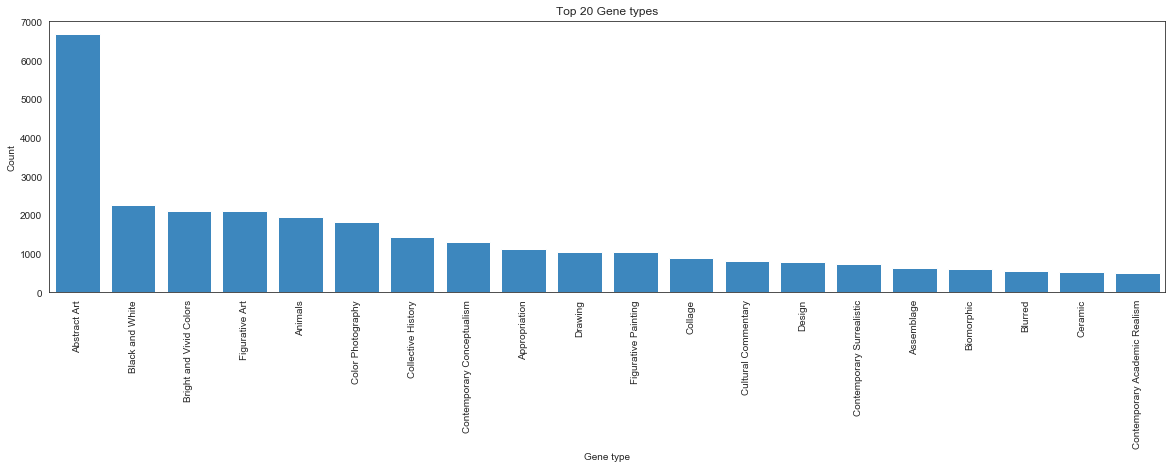

In [46]:
#genes distribution with seaborn - top 20 genes
gene_names = list(genes_lim.index)
gene_count = genes_lim.values
plt.figure(figsize=(20,5))
graph = sns.barplot(x = gene_names, y=gene_count, color = "#288AD3")
graph.set_xlabel('Gene type')
graph.set_xticklabels(gene_names, rotation=90)
graph.set_ylabel('Count')
plt.title('Top 20 Gene types, ignoring time and geography-specific genes')